 ##### Задача 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


1. Скачать данные
2. Изучите стоимости недвижимости
3. Изучите распределение квадратуры жилой
4. Изучите распределение года постройки

In [5]:
df = pd.read_csv('./kc_house_data.csv', sep=',')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


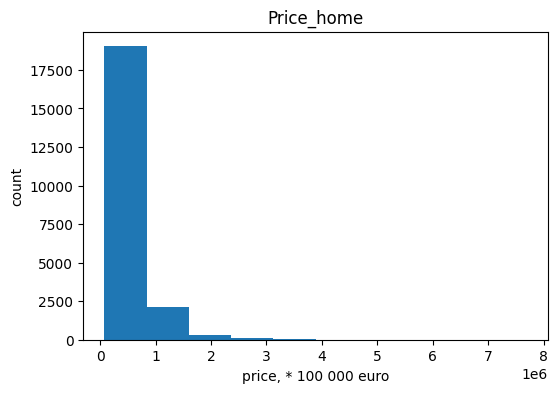

In [25]:
plt.figure(figsize=(6,4))
plt.hist(df['price'])
plt.xlabel('price, * 100 000 euro')
plt.ylabel('count')
plt.title('Price_home');

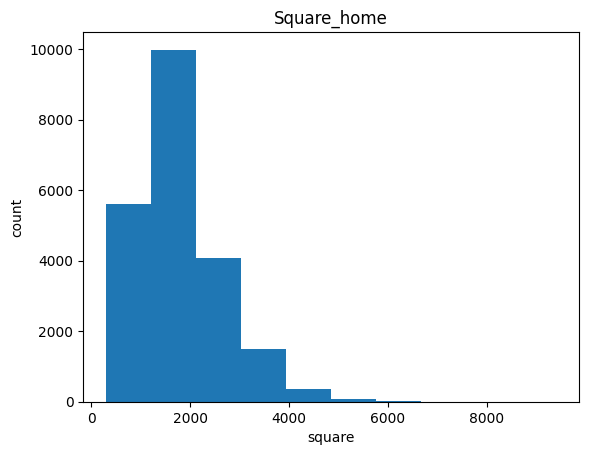

In [23]:
plt.hist(df['sqft_above'])
plt.xlabel('square')
plt.ylabel('count_metre')
plt.title('Square_home');

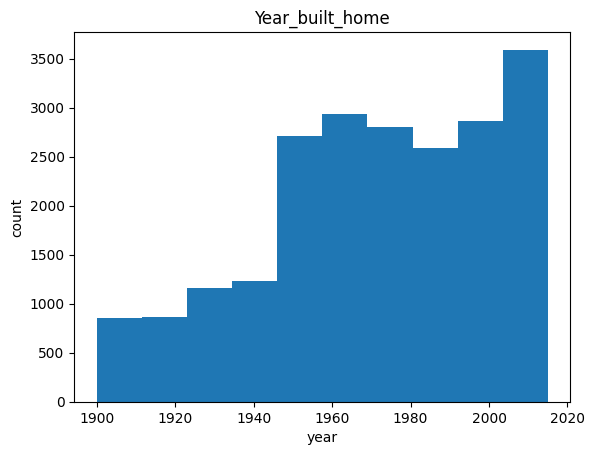

In [24]:
plt.hist(df['yr_built'])
plt.xlabel('year')
plt.ylabel('count_home')
plt.title('Year_built_home');

Вывод: Максимальное количество домов имеет стоимость до 100 000 евро, площадь 2000 метров квадратных, построены они были после 2000 года

 ##### Задача 2 
* Изучите распределение домов от наличия вида на набережную
* Постройте график
* Сделайте выводы

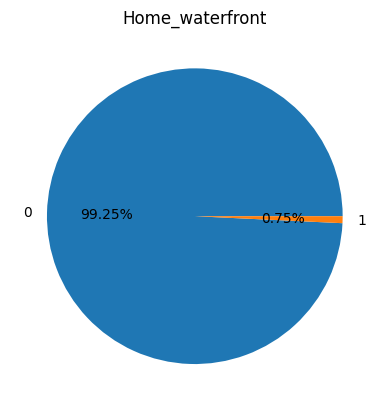

In [27]:

temp = df['waterfront'].value_counts()
plt.pie(temp.values, autopct='%1.2f%%',labels=temp.index)
plt.title('Home_waterfront')
plt.xticks(rotation=30);

Вывод: менее 1 процента домов имеют вид на набережную.

* Изучите распределение этажей домов

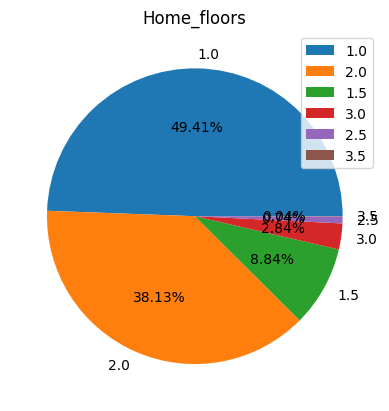

In [29]:

temp1 = df['floors'].value_counts()
plt.pie(temp1.values, autopct='%1.2f%%',labels=temp1.index)
plt.title('Home_floors')
plt.legend(temp1.index);
plt.xticks(rotation=30);

* Изучите распределение состояния домов

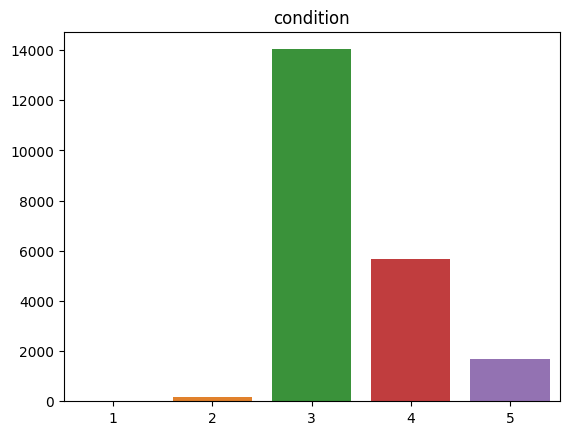

In [30]:
counts = df['condition'].value_counts()
       
plt.title('condition')
sns.barplot(x=counts.index, y=counts.values)    
plt.show()

Вывод: почти половина домов - одноэтажные, состоние большего количества домов оценивается на 3 по пятибальной шкале.

 ##### Задача 3
* Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
* Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

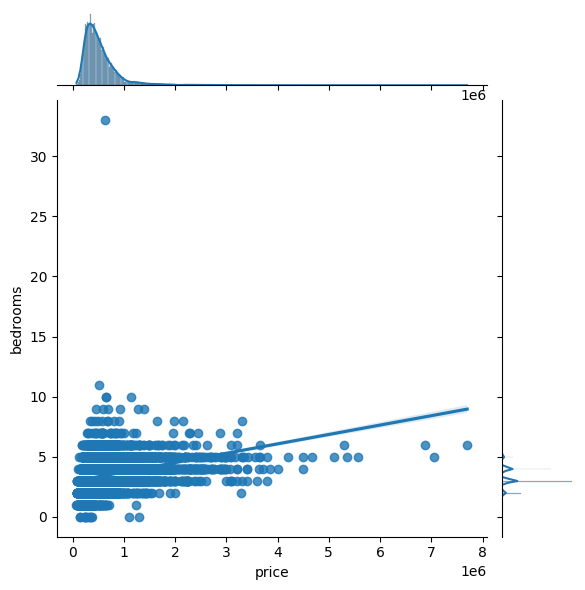

In [31]:
sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg');

Вывод: стоимость жилья напрямую зависит от количества спален. 

C:\Users\Roman\AppData\Local\Temp\ipykernel_11140\2148155669.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


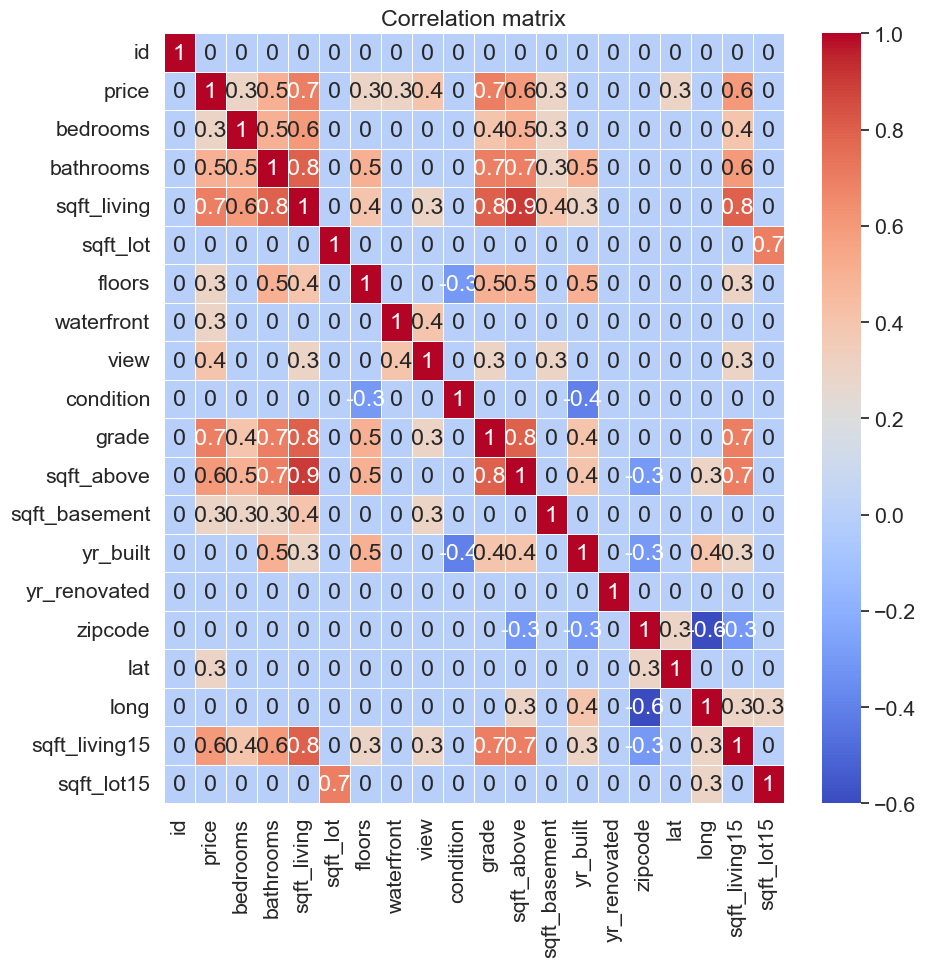

In [49]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

Вывод: корреляционная матрица помогает выявить все зависимости характеристик недвижимости.

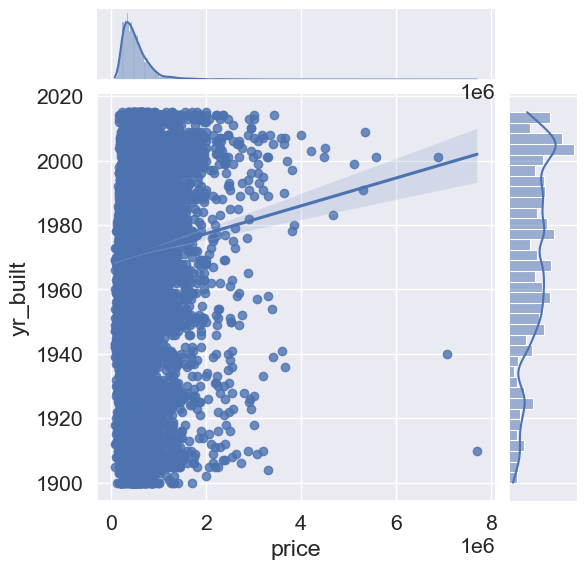

In [42]:
sns.jointplot(x=df['price'], y=df['yr_built'], kind='reg');

Вывод: прямой зависимости стоимости недвижимости от года постройки нет, возможно сказывается показатель реновации дома.

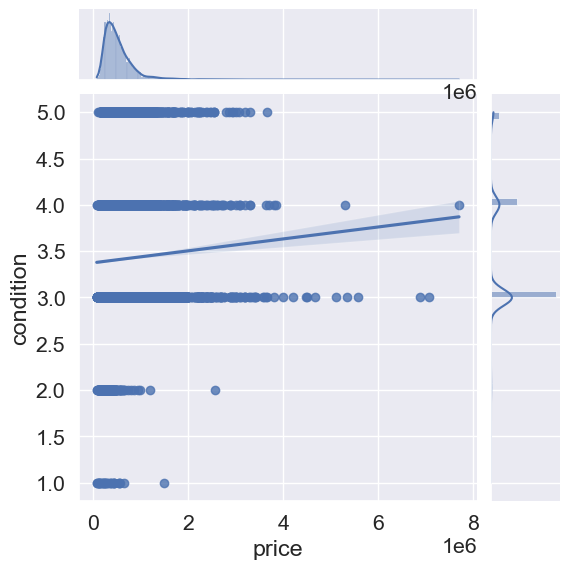

In [43]:
sns.jointplot(x=df['price'], y=df['condition'], kind='reg');

Вывод: Дома в хорошем состоянии имеют более высокую стоимость.

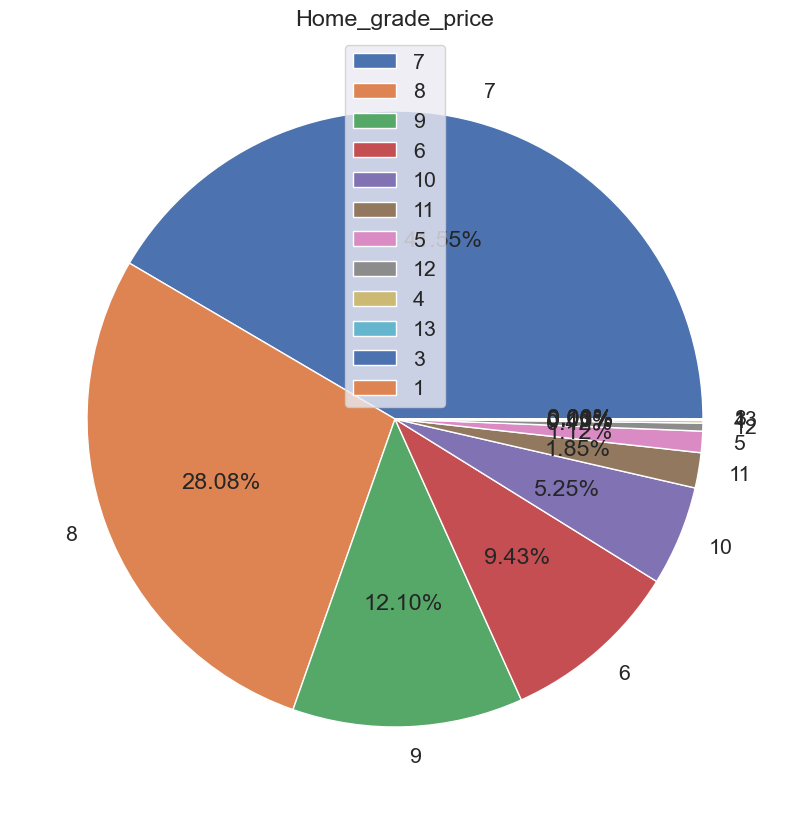

In [51]:

temp2 = df['grade'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(temp2.values, autopct='%1.2f%%',labels=temp2.index)
plt.title('Home_grade_price')
plt.legend(temp2.index)
plt.xticks(rotation=30);

Вывод: 45% процентов от общей стоимости занимают дома с  средним уровнем конструкции и дизайна (7 по десятибальной шкале.) 